# Analisis Sentimen PSBB COVID-19

## > Memanggil Library Yang Dibutuhkan

In [1]:
#Memanggil Library Yang Dibutuhkan

import tweepy
import csv
import re
import pandas as pd
import nltk
import Sastrawi
import sklearn
import matplotlib.pyplot as plt

## > Akuisisi Data

In [ ]:
#Memasukkan dan Mengkoneksi API Twitter

consumer_key="BCpVFK4D4IjkDfa3Zz1Ez0Ipi"
consumer_secret="RzKS2hTeBmuyZmnTQNmb60amGrZcDcz0TG6hKkmxs5I3pCDXk7"
access_token="388776498-RhK6Uy0kvfS3sXYODwMEl8rzKgSWkly0VePSNZQG"
access_token_secret="TcqggzupkuePud53Mg15LAvoxwlwc85rOUpIlAhTM8GCI"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

print('API Tersambung')

In [2]:
#Mengambil Tweets PSBB dan COVID-19 dari Twitter

with open(r'D:\Kuliah\PI\Baru\01tweets_psbb_covid-19.csv','w', encoding='utf8') as file:
  w = csv.writer(file)
  for tweet in tweepy.Cursor(api.search, q="psbb covid-19" + ' -filter:retweets', lang="id", tweet_mode='extended').items(1000):
    w.writerow([tweet.full_text.replace('\n',' ')])

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Kuliah\\Penulisan Ilmiah Bismillah\\Baru\\01tweets_psbb_covid-19.csv'

In [2]:
#Mengatur tampilan DataFrame
pd.options.display.max_rows = 50
#pd.set_option("display.max_rows", 50, "display.max_columns", None)
pd.set_option('display.max_colwidth', -1)

C:\Users\Nabhan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
#Membuat dataframe dari hasil tweets yang sudah diambil dan diberi label

source=r"D:\Kuliah\PI\Baru\02tweets_berlabel.csv"
labeled_data = pd.read_csv(source)
labeled_data.shape
labeled_data

In [ ]:
#Merapihkan Hasil Pelabelan Manual

labeled_data = labeled_data.drop(['label_user1','label_user2','label_user3','jumlah_label', 'label_kecil'], axis=1) # menghapus kolom yang tidak perlu
labeled_data = labeled_data.astype(str) #Merubah tipe data menjadi string
labeled_data.to_csv(r'D:\Kuliah\PI\Baru\03tweets_hasillabel.csv', index=False) #Menyimpan tabel kedalam bentuk .csv

## > Tahap Pre-Processing

In [ ]:
#Melakukan Case Folding

labeled_data['hasil_case_folding']= labeled_data.apply(lambda row: str.lower(row['tweet_awal']), axis =1)
labeled_data = labeled_data[["tweet_awal", "hasil_case_folding", "hasil_label"]] #Mengurutkan kolom pada tabel

In [ ]:
#Cleansing
#Membuat function untuk cleansing

def hapus_https(teks):
    teks = re.sub(r"https?\://\S+", "", teks) #Menghapus link https
    return teks
def hapus_mention(teks):
    teks = re.sub(r"[@][\w_-]+", "", teks) #Menghapus mention
    return teks
def hapus_hashtag(teks):
    teks = re.sub(r"[#][\w_-]+", "", teks) #Menghapus hashtag
    return teks
def hapus_tandabaca(teks):
    teks = re.sub(r"[^\w\s]", " ", teks) #Menghapus tanda baca
    return teks
def hapus_angka(teks):
    teks = re.sub(r"\d+"," ",teks) #Menghapus angka
    return teks
def hapus_spasiganda(teks):
    teks = re.sub(r" +", " ",teks) #Menghapus spasi ganda
    return teks
def hapus_spasiawal(teks):
    teks = re.sub(r"^\s+","",teks) #Menghapus spasi di awal kalimat
    return teks
def hapus_spasiakhir(teks):
    teks = re.sub(r"\s+$","",teks) #Menghapu spasi di akhir kalimat
    return teks

In [ ]:
#Cleansing
#Menjalankan proses cleansing

labeled_data['hasil_hapus_https']= labeled_data['hasil_case_folding'].apply(lambda row: hapus_https(str(row)))
labeled_data['hasil_hapus_mention']= labeled_data['hasil_hapus_https'].apply(lambda row: hapus_mention(str(row)))
labeled_data['hasil_hapus_hastag']= labeled_data['hasil_hapus_mention'].apply(lambda row: hapus_hashtag(str(row)))
labeled_data['hasil_hapus_tandabaca']= labeled_data['hasil_hapus_hastag'].apply(lambda row: hapus_tandabaca(str(row)))
labeled_data['hasil_hapus_angka']= labeled_data['hasil_hapus_tandabaca'].apply(lambda row: hapus_angka(str(row)))
labeled_data['hasil_hapus_spasiganda']= labeled_data['hasil_hapus_angka'].apply(lambda row: hapus_spasiganda(str(row)))
labeled_data['hasil_hapus_spasiawal']= labeled_data['hasil_hapus_spasiganda'].apply(lambda row: hapus_spasiawal(str(row)))
labeled_data['hasil_hapus_spasiakhir']= labeled_data['hasil_hapus_spasiawal'].apply(lambda row: hapus_spasiakhir(str(row)))

In [7]:
labeled_data

,tweet_awal,hasil_case_folding,hasil_label,hasil_hapus_https,hasil_hapus_mention,hasil_hapus_hastag,hasil_hapus_tandabaca,hasil_hapus_angka,hasil_hapus_spasiganda,hasil_hapus_spasiawal,hasil_hapus_spasiakhir
0,"Menurut Tito Karnavian,keberhasilan wilayah Anies Baswedan dalam menekan laju kasus covid-19 bukan tentang PSBB Jakarta Justru keberhasilan Jakarta ada pd penerapan PSBB yang efektif di Kota Depok Ternyata kuncinya kota Depok friends Jng GR dulu...🤭 https://t.co/9r4CLJV4LB","menurut tito karnavian,keberhasilan wilayah anies baswedan dalam menekan laju kasus covid-19 bukan tentang psbb jakarta justru keberhasilan jakarta ada pd penerapan psbb yang efektif di kota depok ternyata kuncinya kota depok friends jng gr dulu...🤭 https://t.co/9r4cljv4lb",Positif,"menurut tito karnavian,keberhasilan wilayah anies baswedan dalam menekan laju kasus covid-19 bukan tentang psbb jakarta justru keberhasilan jakarta ada pd penerapan psbb yang efektif di kota depok ternyata kuncinya kota depok friends jng gr dulu...🤭","menurut tito karnavian,keberhasilan wilayah anies baswedan dalam menekan laju kasus covid-19 bukan tentang psbb jakarta justru keberhasilan jakarta ada pd penerapan psbb yang efektif di kota depok ternyata kuncinya kota depok friends jng gr dulu...🤭","menurut tito karnavian,keberhasilan wilayah anies baswedan dalam menekan laju kasus covid-19 bukan tentang psbb jakarta justru keberhasilan jakarta ada pd penerapan psbb yang efektif di kota depok ternyata kuncinya kota depok friends jng gr dulu...🤭",menurut tito karnavian keberhasilan wilayah anies baswedan dalam menekan laju kasus covid 19 bukan tentang psbb jakarta justru keberhasilan jakarta ada pd penerapan psbb yang efektif di kota depok ternyata kuncinya kota depok friends jng gr dulu,menurut tito karnavian keberhasilan wilayah anies baswedan dalam menekan laju kasus covid bukan tentang psbb jakarta justru keberhasilan jakarta ada pd penerapan psbb yang efektif di kota depok ternyata kuncinya kota depok friends jng gr dulu,menurut tito karnavian keberhasilan wilayah anies baswedan dalam menekan laju kasus covid bukan tentang psbb jakarta justru keberhasilan jakarta ada pd penerapan psbb yang efektif di kota depok ternyata kuncinya kota depok friends jng gr dulu,menurut tito karnavian keberhasilan wilayah anies baswedan dalam menekan laju kasus covid bukan tentang psbb jakarta justru keberhasilan jakarta ada pd penerapan psbb yang efektif di kota depok ternyata kuncinya kota depok friends jng gr dulu,menurut tito karnavian keberhasilan wilayah anies baswedan dalam menekan laju kasus covid bukan tentang psbb jakarta justru keberhasilan jakarta ada pd penerapan psbb yang efektif di kota depok ternyata kuncinya kota depok friends jng gr dulu
1,"Indikator makroekonomi 2021 dipengaruhi oleh baseline ekonomi 2020 yg terdampak pandemi Covid-19. Dampak ke ekonomi sudah dirasakan, terlihat dari melambatanya pertumbuhan ekonomi Q1 2020 yg disebabkan oleh menurunnya konsumsi rumah tangga &amp; investasi akibat PSBB. #infofiskal https://t.co/h7U14N5YOC","indikator makroekonomi 2021 dipengaruhi oleh baseline ekonomi 2020 yg terdampak pandemi covid-19. dampak ke ekonomi sudah dirasakan, terlihat dari melambatanya pertumbuhan ekonomi q1 2020 yg disebabkan oleh menurunnya konsumsi rumah tangga &amp; investasi akibat psbb. #infofiskal https://t.co/h7u14n5yoc",Negatif,"indikator makroekonomi 2021 dipengaruhi oleh baseline ekonomi 2020 yg terdampak pandemi covid-19. dampak ke ekonomi sudah dirasakan, terlihat dari melambatanya pertumbuhan ekonomi q1 2020 yg disebabkan oleh menurunnya konsumsi rumah tangga &amp; investasi akibat psbb. #infofiskal","indikator makroekonomi 2021 dipengaruhi oleh baseline ekonomi 2020 yg terdampak pandemi covid-19. dampak ke ekonomi sudah dirasakan, terlihat dari melambatanya pertumbuhan ekonomi q1 2020 yg disebabkan oleh menurunnya konsumsi rumah tangga &amp; investasi akibat psbb. #infofiskal","indikator makroekonomi 2021 dipengaruhi oleh baseline ekonomi 202

In [ ]:
labeled_data.to_csv(r'D:\Kuliah\PI\Baru\04tweets_hasil_cleansing.csv', index=False) #Menyimpan hasil cleansing

In [ ]:
source=r"D:\Kuliah\PI\Baru\04tweets_hasil_cleansing.csv"
uncleaned_data1 = pd.read_csv(source) #Mengambil data hasil cleansing yang sudah disimpan sebelumnya
uncleaned_data1 = uncleaned_data.drop(['tweet_awal','hasil_case_folding','hasil_hapus_https',
                                       'hasil_hapus_mention','hasil_hapus_hastag','hasil_hapus_tandabaca',
                                       'hasil_hapus_angka','hasil_hapus_spasiganda','hasil_hapus_spasiawal'], axis=1) #Menghapus kolom yang tidak perlu
uncleaned_data1 = uncleaned_data[["hasil_hapus_spasiakhir","hasil_label"]] #Mengurutkan kolom pada tabel

In [ ]:
uncleaned_data1.drop_duplicates(inplace=True) #Menghapus data duplikat
uncleaned_data1.to_csv(r'D:\Kuliah\PI\Baru\05tweets_hasil_hapus_duplikat.csv', index=False) #Menyimpan hasil hapus duplikat

In [ ]:
uncleaned_data1 = uncleaned_data.dropna(axis=0, subset=['hasil_label']) #Menghapus data kosong
uncleaned_data1.to_csv(r'D:\Kuliah\PI\Baru\06tweets_hasil_hapus_data_kosong.csv', index=False)#Menyimpan hasil hapus data kosong

In [2]:
source=r"D:\Kuliah\PI\Baru\06tweets_hasil_hapus_data_kosong.csv"
uncleaned_data2 = pd.read_csv(source) #Mengambil data hasil hapus data kosong yang sudah disimpan sebelumnya
uncleaned_data2.shape

(877, 5)

In [3]:
uncleaned_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hasil_hapus_spasiakhir  877 non-null    object 
 1   hasil_label             877 non-null    object 
 2   hasil_stopword1         0 non-null      float64
 3   hasil_stopword2         0 non-null      float64
 4   hasil_stemming          0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 34.4+ KB


In [4]:
#Menghapus Stopword#

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary


stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword =['adanya','adapun','agaknya','akankah','akhirnya','aku',
                'akulah','amatlah','andalah','antar','diantaranya','antaranya',
                'diantara','apa','apaan','apabila','apatah','ataukah','ataupun',
                'bagai','bagaikan','sebagainya','bagaimana','sebagaimana','bagaimanakah',
                'bahkan','bahwasanya','sebaliknya','banyak','sebanyak','beberapa','seberapa',
                'begini','beginian','beginikah','beginilah','sebegini','begitukah','begitulah',
                'begitupun','sebegitu','belumlah','sebelumnya','sebenarnya','berapa','berapakah',
                'berapalah','berapapun','betulkah','biasa','biasanya','bila','bilakah','bisakah','sebisanya',
                'bolehkah','bolehlah','buat','bukan','bukankah','bukanlah','bukannya','cuma','percuma','dekat',
                'demikianlah','sedemikian','depan','dialah','dini','diri','dirinya','terdiri','dong','dulu',
                'enggak','enggaknya','entah','entahlah','terhadapnya','hampir','hanyalah','haruslah','harusnya',
                'hendak','hendaklah','hendaknya','hingga','ialah','ibarat','inginkah','inginkan','inikah','inilah',
                'itukah','jangan','jangankan','janganlah','jikalau','justru','kala','kalau','kalaulah','kalaupun',
                'kalian','kamilah','kamu','kamulah','kan','kapan','kapankah','kapanpun','dikarenakan','karenanya','kecil',
                'kemudian','kepadanya','seketika','khususnya','kini','kinilah','kiranya','sekiranya','kitalah','kok','lagian',
                'lah','lainnya','selaku','lalu','melalui','terlalu','lama','lamanya','selama','selamanya','lebih','terlebih',
                'bermacam','macam','semacam','makanya','makin','malah','malahan','mampu','mampukah','mana','manakala',
                'manalagi''masihkah','semasih''masing','mau''maupun','semaunya','memang','merekalah','meski','meskipun',
                'semula','mungkin','mungkinkah','nah','nantinya','nyaris','olehnya','seorang','seseorang','padanya',
                'padahal','paling','sepanjang','pantas','sepantasnya','sepantasnyalah','pastilah','per','pernah','merupakan',
                'rupanya','serupa','saatnya','sesaat','sajalah','saling','bersama','sama','sesama''sana','sangat','sangatlah',
                'sayalah','se','sebabnya','sebuah','tersebut','tersebutlah','sedang','sedikit','sedikitnya','segala','segalanya',
                'segera','sesegera','sejak','sejenak','sekali','sekalian','sekalipun','sesekali','sekaligus','sekarang','sekitarnya',
                'sela','selalu','seluruh','seluruhnya','semakin','sempat','semua','semuanya','sendiri','sendirinya','sepertinya',
                'sering','seringnya','siapa','siapakah','siapapun','disini','disinilah','sini','sinilah','sesuatunya',
                'suatu','sesudahnya','sudahkah','sudahlah','tadi','tadinya','tak','tentulah',
                'tentunya','tertentu','tiap','tidakkah','toh','waduh','wah','wahai','sewaktu','walaupun',
                'wong','a','b','c','d','e','f','d','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','yg','vs','dgn']

data = stop_factory + more_stopword #Menambah list stopword
dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)

In [5]:
#Proses hapus stopword pertama

for i, hasil_hapus_spasiakhir in enumerate (uncleaned_data2['hasil_hapus_spasiakhir']):
    stop = str.remove(hasil_hapus_spasiakhir)
    uncleaned_data2['hasil_stopword1'].iloc[i] = (stop)

C:\Users\Nabhan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
uncleaned_data2

,hasil_hapus_spasiakhir,hasil_label,hasil_stopword1,hasil_stopword2,hasil_stemming
0,menurut tito karnavian keberhasilan wilayah an...,Positif,tito karnavian keberhasilan wilayah anies basw...,NaN,NaN
1,indikator makroekonomi dipengaruhi oleh baseli...,Negatif,indikator makroekonomi dipengaruhi baseline ek...,NaN,NaN
2,indonesia dijamin ngga akan beres covid kalau ...,Negatif,indonesia dijamin ngga beres covid kesadaran l...,NaN,NaN
3,perubahan apa saja yang akan terjadi pada bisn...,Negatif,perubahan saja akan terjadi bisnis indonesia p...,NaN,NaN
4,masyarakat harus disiplin dan mematuhi protoko...,Positif,masyarakat disiplin mematuhi protokol kesehata...,NaN,NaN
...,...,...,...,...,...
872,lihat video bapak ngamuk di bogor krn ditegur ...,Negatif,lihat video bapak ngamuk bogor krn ditegur ter...,NaN,NaN
873,memangnya tahapan awal penyebaran covid diselu...,Negatif,memangnya tahapan awal penyebaran covid diselu...,NaN,NaN
874,new post covid cianjur menyebar di kecamatan p...,Negatif,new post covid cianjur menyebar kecamatan pemk...,NaN,NaN
875,bagaimna cara pendataannya dan implementasi da...,Negatif,bagaimna cara pendataannya implementasi peratu...,NaN,NaN


In [7]:
#Proses hapus stopword kedua

for i, hasil_stopword1 in enumerate (uncleaned_data2['hasil_stopword1']):
    stop = str.remove(hasil_stopword1)
    uncleaned_data2['hasil_stopword2'].iloc[i] = (stop)

C:\Users\Nabhan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
uncleaned_data2.to_csv(r'D:\Kuliah\PI\Baru\07tweets_hasil_hapus_stopword.csv', index=False)#Menyimpan hasil stopword

,hasil_hapus_spasiakhir,hasil_label,hasil_stopword1,hasil_stopword2,hasil_stemming
0,menurut tito karnavian keberhasilan wilayah an...,Positif,tito karnavian keberhasilan wilayah anies basw...,tito karnavian keberhasilan wilayah anies basw...,NaN
1,indikator makroekonomi dipengaruhi oleh baseli...,Negatif,indikator makroekonomi dipengaruhi baseline ek...,indikator makroekonomi dipengaruhi baseline ek...,NaN
2,indonesia dijamin ngga akan beres covid kalau ...,Negatif,indonesia dijamin ngga beres covid kesadaran l...,indonesia dijamin ngga beres covid kesadaran l...,NaN
3,perubahan apa saja yang akan terjadi pada bisn...,Negatif,perubahan saja akan terjadi bisnis indonesia p...,perubahan akan terjadi bisnis indonesia pandem...,NaN
4,masyarakat harus disiplin dan mematuhi protoko...,Positif,masyarakat disiplin mematuhi protokol kesehata...,masyarakat disiplin mematuhi protokol kesehata...,NaN
...,...,...,...,...,...
872,lihat video bapak ngamuk di bogor krn ditegur ...,Negatif,lihat video bapak ngamuk bogor krn ditegur ter...,lihat video bapak ngamuk bogor krn ditegur ter...,NaN
873,memangnya tahapan awal penyebaran covid diselu...,Negatif,memangnya tahapan awal penyebaran covid diselu...,memangnya tahapan awal penyebaran covid diselu...,NaN
874,new post covid cianjur menyebar di kecamatan p...,Negatif,new post covid cianjur menyebar kecamatan pemk...,new post covid cianjur menyebar kecamatan pemk...,NaN
875,bagaimna cara pendataannya dan implementasi da...,Negatif,bagaimna cara pendataannya implementasi peratu...,bagaimna cara pendataannya implementasi peratu...,NaN


In [7]:
#Stemming#

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

for i, hasil_stopword2 in enumerate (uncleaned_data2['hasil_stopword2']):
hasil_stem = stemmer.stem(uncleaned_data2["hasil_stopword2"].iloc[i])
uncleaned_data2['hasil_stemming'].iloc[i] = (hasil_stem)

IndentationError: expected an indented block (<ipython-input-7-7b630856c15b>, line 8)

In [ ]:
uncleaned_data2[["hasil_stemming","hasil_label"]].to_csv(r'D:\Kuliah\PI\Baru\08tweets_hasil_stemming.csv', index=False)#Menyimpan hasil stemming

In [4]:
#Mengambil data hasil hapus manual
source=r"D:\Kuliah\PI\Baru\09manual_cleaned_tweets.csv"
uncleaned_data2 = pd.read_csv(source)
uncleaned_data2 = uncleaned_data2.drop(['kalimat_bersih'], axis=1) 
uncleaned_data2.shape
uncleaned_data2

,hasil_hapus_manual,hasil_label
0,tito karnavian hasil wilayah anies baswedan tekan laju kasus covid psbb jakarta hasil jakarta terap psbb efektif kota depok nyata kunci kota depok jng,Positif
1,indikator makroekonomi pengaruh ekonomi dampak pandemi covid dampak ekonomi rasa lihat melambatanya tumbuh ekonomi sebab turun konsumsi rumah tangga investasi akibat psbb,Negatif
2,indonesia jamin beres covid sadar lapis masyarakat rendah pcr capai target ribu hari hari ribu hari perintah longgar psbb,Negatif
3,ubah akan jadi bisnis indonesia pandemi covid akhir laku sistem psbb putus rantai sebar virus covid masyarakat kerja giat rumah masuk kerja,Negatif
4,masyarakat disiplin patuh protokol sehat cegah virus covid,Positif
...,...,...
872,lihat video bapak ngamuk bogor krn tegur kait psbb boleh duduk mobil orang kaya data masuk daftar usah gubris rs lapor kena covid,Negatif
873,tahap awal sebar covid indonesia pandemi beres selesai tangan serang covid gelombang dua raya idul fitri serang balik covid longgar psbb sembuh sakit stres,Negatif
874,post covid cianjur sebar camat pemkab terap psbb parsial been on prasasti jabar,Negatif
875,bagaimna cara data implementasi atur psbb gorontalo duduk baik warga gorontalo datang dampak covid bingung atur bingung,Negatif


In [ ]:
#Tokenizing#

from nltk.tokenize import word_tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

uncleaned_data2['tokenized_tweets'] = uncleaned_data2['hasil_hapus_manual'].apply(word_tokenize_wrapper)

In [ ]:
uncleaned_data2[['tokenized_tweets','hasil_label']].to_csv(r'D:\Kuliah\PI\Baru\10cleaned_tweets.csv', index=False) #Menyimpan hasil tokenizing

In [8]:
#Mengambil data bersih

source=r"D:\Kuliah\PI\Baru\10cleaned_tweets.csv"
cleaned_data = pd.read_csv(source)
cleaned_data.shape
cleaned_data

,tokenized_tweets,hasil_label
0,"['tito', 'karnavian', 'hasil', 'wilayah', 'ani...",Positif
1,"['indikator', 'makroekonomi', 'pengaruh', 'eko...",Negatif
2,"['indonesia', 'jamin', 'beres', 'covid', 'sada...",Negatif
3,"['ubah', 'akan', 'jadi', 'bisnis', 'indonesia'...",Negatif
4,"['masyarakat', 'disiplin', 'patuh', 'protokol'...",Positif
...,...,...
872,"['lihat', 'video', 'bapak', 'ngamuk', 'bogor',...",Negatif
873,"['tahap', 'awal', 'sebar', 'covid', 'indonesia...",Negatif
874,"['post', 'covid', 'cianjur', 'sebar', 'camat',...",Negatif
875,"['bagaimna', 'cara', 'data', 'implementasi', '...",Negatif


In [9]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [10]:
#Pembagian Data Latih dan Data Uji#



x_train70, x_test30, y_train70, y_test30 = model_selection.train_test_split(cleaned_data['tokenized_tweets'], cleaned_data['hasil_label'], test_size = 0.3, random_state = 0)

#train_df70 = pd.DataFrame()
#train_df70['kalimat'] = x_train70
#train_df70['sentimen'] = y_train70
#train_df70.to_csv(r'D:\Kuliah\PI\Baru\Pre Train Data 2\Train_Data7030.csv', index=False)

#test_df30 = pd.DataFrame()
#test_df30['kalimat'] = x_test30
#test_df30['sentimen'] = y_test30
#test_df30.to_csv(r'D:\Kuliah\PI\Baru\Pre Train Data 2\Test_Data7030.csv', index=False)

print('Pembagian 70 30 selesai')

Pembagian 70 30 selesai


In [13]:
x_train70

235    ['rapat', 'koordinasi', 'gugus', 'tugas', 'men...
428    ['wali', 'kota', 'bekas', 'rahmat', 'effendi',...
241    ['relaksasi', 'psbb', 'bukti', 'perintah', 'pu...
344    ['laksana', 'psbb', 'perintah', 'sampai', 'nar...
795    ['psbb', 'jakarta', 'situasi', 'jakarta', 'ten...
                             ...                        
835    ['marwan', 'jelas', 'tuntas', 'pandemi', 'covi...
192    ['polri', 'sat', 'lantas', 'jaktim', 'dishub',...
629    ['buka', 'tempat', 'akibat', 'terap', 'psbb', ...
559    ['jumlah', 'provinsi', 'alami', 'lambat', 'cov...
684    ['perintah', 'provinsi', 'terap', 'psbb', 'har...
Name: tokenized_tweets, Length: 613, dtype: object

In [11]:
#Mengambil data yang sudah dibagi

source1=r'D:\Kuliah\PI\Baru\Pre Train Data 2\Train_Data7030.csv'
train70 = pd.read_csv(source1)
source2=r'D:\Kuliah\PI\Baru\Pre Train Data 2\Test_Data7030.csv'
test30 = pd.read_csv(source2)

x_train70 = train70['kalimat']
y_train70 = train70['sentimen']
x_test30 = test30['kalimat']
y_test30 =test30['sentimen']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [12]:
#Proses Pembobotan Kata TF-IDF"

tfidf_vect = TfidfVectorizer(use_idf=True)
corpus = cleaned_data['tokenized_tweets']
x = tfidf_vect.fit(corpus)

x_train_tfidf70 = x.transform(x_train70)
x_test_tfidf30 = x.transform(x_test30)

In [12]:
#Menyimpan hasil vectorizer

with open(r'D:\Kuliah\PI\Baru\tfidf_vect.pkl', 'wb') as handle:
                    pickle.dump(x, handle)

In [9]:
tfidf_vect = pickle.load(open(r'D:\Kuliah\PI\Baru\tfidf_vect.pkl', "rb" ))

In [10]:
tfidf_vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [17]:
x_train_tfidf70
x_test_tfidf30

<264x2411 sparse matrix of type '<class 'numpy.float64'>'
	with 3727 stored elements in Compressed Sparse Row format>

In [17]:
#Membuat dan menyimpan tabel berisi hasil TFIDF

df = pd.DataFrame(x_train_tfidf70.toarray(),columns =tfidf_vect.get_feature_names())
df.to_csv(r'D:\Kuliah\PI\Baru\Pre Train Data 2\TFIDF_Train_Data.csv',index=False)
df2 = pd.DataFrame(x_test_tfidf30.toarray(),columns =tfidf_vect.get_feature_names())
df2.to_csv(r'D:\Kuliah\PI\Baru\Pre Train Data 2\TFIDF_Test_Data.csv',index=False)

## > Tahap Processing

In [5]:
from sklearn import svm

In [14]:
#Melatih Data#

SVM70 = svm.SVC(kernel='linear')
SVM70.fit(x_train_tfidf70,y_train70)

NameError: name 'x_train_tfidf70' is not defined

In [23]:
#Menyimpan model klasifikasi hasil training
with open(r'D:\Kuliah\PI\Baru\trained_svm_model.pkl', 'wb') as handle:
                    pickle.dump(SVM70, handle)

In [18]:
#Load model klasifikasi hasil training
SVM70 = pickle.load(open(r'D:\Kuliah\PI\Baru\trained_svm_model.pkl', "rb" ))

In [19]:
#Pengujian Data#

predictions_SVM30 = SVM70.predict(x_test_tfidf30) #Melakukan pengujian data dengan menggunakan data uji 

In [20]:
#Membuat tabel hasil pengujian
prediksi7030 = pd.DataFrame()
prediksi7030['kalimat'] = x_test30
prediksi7030['sentimen'] = y_test30
prediksi7030['prediksi'] = predictions_SVM30
prediksi7030

,kalimat,sentimen,prediksi
0,"['media', 'angka', 'mati', 'covid', 'tingkat', 'berita', 'bikin', 'stres', 'bikin', 'berita', 'senang', 'media', 'angka', 'sembuh', 'covid', 'besar', 'ketimbang', 'angka', 'mati', 'psbb', 'hirau', 'diam', 'diam', 'mudik', 'main', 'rumah', 'pacar', 'bikin', 'konten', 'pas', 'sahur']",Negatif,Negatif
1,"['teman', 'praja', 'mendagri', 'tito', 'karnavian', 'laku', 'koordinasi', 'monitoring', 'langsung', 'tangan', 'covid', 'masuk', 'bijak', 'psbb', 'ambil', 'perintah', 'kota', 'depok']",Positif,Positif
2,"['aceh', 'ini', 'bebes', 'tular', 'covid', 'lokal', 'salah', 'satu', 'syarat', 'psbb']",Positif,Negatif
3,"['selamat', 'sehat', 'aman', 'penting', 'kita', 'ingat', 'psbb', 'gera', 'jaga', 'jarak', 'efektif', 'tuju', 'putus', 'rantai', 'tular', 'covid']",Positif,Positif
4,"['hari', 'psbb', 'tambah', 'kasus', 'konfirmasi', 'covid', 'jatim', 'landai']",Positif,Positif
...,...,...,...
259,"['it', 'atur', 'serentak', 'atas', 'psbb', 'covid', 'masing', 'swasta', 'buka', 'ruang', 'rapat', 'osis', 'terima', 'undang']",Negatif,Positif
260,"['indonesia', 'hati', 'hati', 'longgar', 'psbb', 'ajar', 'negara', 'buru', 'buru', 'longgar', 'lockdown']",Positif,Positif
261,"['salam', 'hari', 'satu', 'lawan', 'covid', 'kawal', 'psbb', 'batas', 'sosial', 'skala', 'besar', 'hari', 'rumah', 'jaga', 'nkri', 'tuan', 'korona']",Positif,Positif
262,"['jumlah', 'kasus', 'positif', 'covid', 'malang', 'terus', 'tingkat', 'rekomendasi', 'batas', 'sosial', 'skala', 'besar', 'psbb', 'psbb', 'lengkap', 'klik']",Negatif,Positif


In [85]:
prediksi7030.to_csv(r'D:\Kuliah\PI\Baru\Hasil SVM\11Prediksi Data Uji.csv', index=False)#Menyimpan tabel hasil pengujian

## > Evaluasi

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [22]:
#Mencari akurasi pengujian

svm_accuracy7030 = accuracy_score(predictions_SVM30, y_test30)*100
svm_accuracy7030 = round(svm_accuracy7030,1)
svm_accuracy7030

78.8

In [23]:
#Mencari precision, recall, dan f1-score

print(classification_report(y_test30, predictions_SVM30))

              precision    recall  f1-score   support

     Negatif       0.83      0.59      0.69       105
     Positif       0.77      0.92      0.84       159

    accuracy                           0.79       264
   macro avg       0.80      0.75      0.76       264
weighted avg       0.79      0.79      0.78       264



## > Visualisasi

In [4]:
jml_prediksi_negatif30 = len(prediksi7030[prediksi7030['prediksi'].str.contains('Negatif')]) #Menghitung banyaknya data hasil prediksi negatif
jml_prediksi_positif30 = len(prediksi7030[prediksi7030['prediksi'].str.contains('Positif')]) #Menghitung banyaknya data hasil prediksi positif
jml_sentimen_negatif30 = len(prediksi7030[prediksi7030['sentimen'].str.contains('Negatif')]) #Menghitung banyaknya data label negatif
jml_sentimen_positif30 = len(prediksi7030[prediksi7030['sentimen'].str.contains('Positif')]) #Menghitung banyaknya data label positif

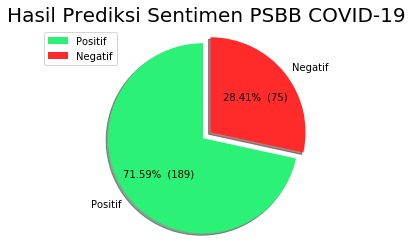

In [9]:
#Membuat pie chart dari hasil prediksi

labels = 'Positif', 'Negatif'
sizes = [jml_prediksi_positif30, jml_prediksi_negatif30]
colors = ['#2bf277','#ff2b2b']

def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots()
explode = (0, 0.1)  
ax.pie(sizes, colors=colors, labels=labels, explode=explode, autopct=make_autopct(sizes),shadow=True, startangle=90)
ax.axis('equal') 
ax.legend(labels, loc = 'upper left') 
plt.title("Hasil Prediksi Sentimen PSBB COVID-19", fontsize = 20)
plt.savefig(r'D:\Kuliah\PI\Baru\Hasil SVM\Gambar Presentase Hasil Prediksi.png')
plt.show()

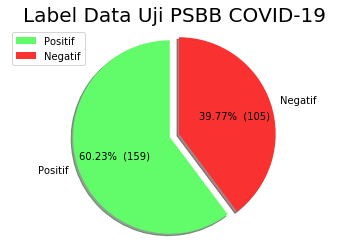

In [87]:
#Membuat pie chart dari label data uji

labels = 'Positif', 'Negatif'
sizes = [jml_sentimen_positif30, jml_sentimen_negatif30]
colors = ['#62fc6a', '#f93131']

def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, explode=explode, autopct=make_autopct(sizes),shadow=True, startangle=90)
ax1.axis('equal') 
ax1.legend(labels, loc = 'upper left') 
plt.title("Label Data Uji PSBB COVID-19", fontsize = 20) 
plt.savefig(r'D:\Kuliah\PI\Baru\Hasil SVM\Gambar Presentase Label Data Uji.png')
plt.show()